In [1]:
import pandas as pd #import pandas
from matplotlib import pyplot as plt #import just the pyplot part of matplotlib


In [2]:
DNase = pd.read_csv("./DNase.csv", index_col= 0) #use pandas to read the csv of DNase made seperately in R

In [3]:
DNase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 176
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Run      176 non-null    int64  
 1   conc     176 non-null    float64
 2   density  176 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.5 KB


In [4]:
DNase.sort_values("Run", inplace= True) #sort the data on the "Run" column

In [5]:
DNase.set_index("Run", inplace= True) #set "Run" as an index to make the next part simpler

In [21]:
DNase.xs(1)

,conc,density
Run,,
1,0.048828,0.017
1,12.500000,1.710
1,12.500000,1.730
1,6.250000,1.364
1,6.250000,1.334
1,3.125000,1.019
1,1.562500,0.609
1,1.562500,0.614
1,3.125000,1.001


In [23]:
points= [] #make an empty array
for i in DNase.index.unique(): #using i to represent each unique value in the index aka Run
    points += [i+1 for i in range(len(DNase.loc[1]))] #make a list of consecutive numbers the length of the data with each index value
    
new_index = pd.MultiIndex.from_tuples(list(zip(DNase.index, points)), names= ["Run", "point"])
#zip the current index with the new array
#use list function to make that a list
#us that list of tuples to form a multi-index with columns named Run and point
print(new_index)

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (11,  7),
            (11,  8),
            (11,  9),
            (11, 10),
            (11, 11),
            (11, 12),
            (11, 13),
            (11, 14),
            (11, 15),
            (11, 16)],
           names=['Run', 'point'], length=176)


In [11]:
DNase.set_index(new_index, inplace= True) #make the multi-index the new index

In [22]:
DNase

,conc,density
Run,,
1,0.048828,0.017
1,12.500000,1.710
1,12.500000,1.730
1,6.250000,1.364
1,6.250000,1.334
1,3.125000,1.019
1,1.562500,0.609
1,1.562500,0.614
1,3.125000,1.001


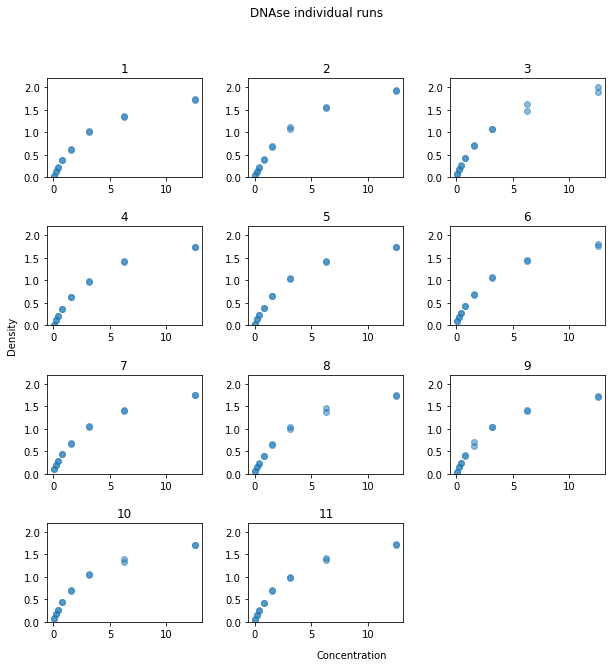

In [12]:
fig = plt.figure(figsize= (10, 10))       #make a figure sized 10 x 10
fig.suptitle("DNAse individual runs")     #add a title
fig.text(0.5, 0.075, "Concentration")
fig.text(0.07, 0.5, "Density", rotation= 90)
pos = 1                                   #initialize a positioning variable
for i in DNase.index.levels[0].unique():  #for each unique value in the top level of the index ("Runs") called i
    fig.add_subplot(4, 3, pos,            #assuming the figure is divided into a 4 X 3 grid, place a new subplot in position pos
                    title= i,             #title the graph with name i
                    #xlabel= "concentration", 
                   # ylabel= "density", 
                    yticks= [0.0, 0.5, 1, 1.5, 2], #forces the yticks to make them all the same
                    ylim= (0, 2.2)) #dont automatically scale the y axis
    
    plt.scatter(DNase.loc[i, "conc"], DNase.loc[i, "density"], alpha= 0.5) #add the actual graph to the subplot
                                          #call pyplots scatter plot function only on the data where the index is i
                                          #x data is the conc column
                                          #y data is the density column
                                          #label for each data set is the same as the value for Run at that time
                                          #alpha is set to make the dots transparent
    pos += 1 #increment the pos variable for the next subplot
    
     

plt.subplots_adjust(hspace= 0.5, wspace= 0.3) #space out the subplots so the labels don't overlap
plt.show() #show the plot
    
